# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [212]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("GlobalLandTemperaturesByMajorCity.csv.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [213]:
data = df[df['dt'] >= '1950-01-01']
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [214]:
data_toronto = data[data['City'] == 'Toronto'][['dt',	'AverageTemperature']]
data_toronto.index = data_toronto['dt'].values
data_toronto = data_toronto.drop('dt', axis=1)
data_toronto = data_toronto.resample('Y').mean()
data_toronto.index = data_toronto.index.year
data_toronto

,AverageTemperature
1950,5.639583
1951,6.259083
1952,7.013417
1953,7.506250
1954,6.243083
...,...
2009,6.282583
2010,7.774500
2011,7.299583
2012,8.664667


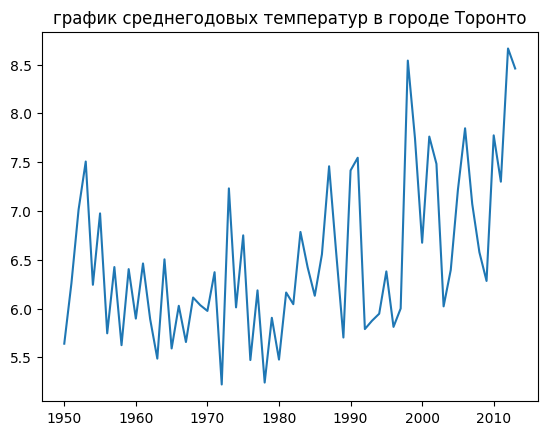

In [215]:
plt.title('график среднегодовых температур в городе Торонто')
plt.plot(data_toronto.index, data_toronto.AverageTemperature)

### Выполним обработку данных (пригодится позже): в координатах поменяем знак, если Latitude c буквой S, иначе не меняем:

In [216]:
data['Latitude'] = data['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
data['Longitude'] = data['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))

C:\Users\dyush\AppData\Local\Temp\ipykernel_7224\3966000461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude'] = data['Latitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'N' else -float(x[:-1]))
C:\Users\dyush\AppData\Local\Temp\ipykernel_7224\3966000461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude'] = data['Longitude'].apply(lambda x: float(x[:-1]) if x[-1] == 'E' else -float(x[:-1]))


# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.   
**Ответ:** Harbin

In [217]:
data_std = data.groupby('City')['AverageTemperature'].std()
data_std.sort_values(ascending=False).head(1)

City
Harbin    14.795223
Name: AverageTemperature, dtype: float64

In [218]:
data_std

City
Abidjan        1.368352
Addis Abeba    1.243894
Ahmadabad      4.229959
Aleppo         8.603454
Alexandria     4.568885
                 ...   
Tokyo          8.094800
Toronto        9.914944
Umm Durman     3.830030
Wuhan          8.757903
Xian           9.308311
Name: AverageTemperature, Length: 100, dtype: float64

In [219]:
data_grouped = data.groupby('City').max()
data_grouped

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
City,,,,,,
Abidjan,2013-09-01,29.923,1.526,Côte D'Ivoire,5.63,-3.23
Addis Abeba,2013-09-01,21.223,3.621,Ethiopia,8.84,38.11
Ahmadabad,2013-09-01,35.419,1.580,India,23.31,72.52
Aleppo,2013-09-01,32.629,1.071,Syria,36.17,37.79
Alexandria,2013-09-01,28.806,1.412,Egypt,31.35,30.16
...,...,...,...,...,...,...
Tokyo,2013-09-01,27.295,1.120,Japan,36.17,139.23
Toronto,2013-09-01,22.620,1.274,Canada,44.20,-80.50
Umm Durman,2013-09-01,35.700,3.963,Sudan,15.27,32.50


In [220]:
data_grouped

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
City,,,,,,
Abidjan,2013-09-01,29.923,1.526,Côte D'Ivoire,5.63,-3.23
Addis Abeba,2013-09-01,21.223,3.621,Ethiopia,8.84,38.11
Ahmadabad,2013-09-01,35.419,1.580,India,23.31,72.52
Aleppo,2013-09-01,32.629,1.071,Syria,36.17,37.79
Alexandria,2013-09-01,28.806,1.412,Egypt,31.35,30.16
...,...,...,...,...,...,...
Tokyo,2013-09-01,27.295,1.120,Japan,36.17,139.23
Toronto,2013-09-01,22.620,1.274,Canada,44.20,-80.50
Umm Durman,2013-09-01,35.700,3.963,Sudan,15.27,32.50


In [221]:
data.index = data['dt'].values
data = data.drop('dt', axis=1)

In [222]:
data_jan = data[(data.index.month == 1) & (data.index.year == 1975)]
data_jan

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1975-01-01,26.500,0.181,Abidjan,Côte D'Ivoire,5.63,-3.23
1975-01-01,16.592,0.411,Addis Abeba,Ethiopia,8.84,38.11
1975-01-01,18.686,0.382,Ahmadabad,India,23.31,72.52
1975-01-01,5.592,0.243,Aleppo,Syria,36.17,37.79
1975-01-01,13.806,0.227,Alexandria,Egypt,31.35,30.16
...,...,...,...,...,...,...
1975-01-01,0.649,0.165,Tokyo,Japan,36.17,139.23
1975-01-01,-5.279,0.223,Toronto,Canada,44.20,-80.50
1975-01-01,21.894,0.427,Umm Durman,Sudan,15.27,32.50
1975-01-01,5.831,0.246,Wuhan,China,29.74,114.46


In [223]:
data_july = data[(data.index.month == 7) & (data.index.year == 1975)]
data_july

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1975-07-01,24.647,0.373,Abidjan,Côte D'Ivoire,5.63,-3.23
1975-07-01,16.456,0.397,Addis Abeba,Ethiopia,8.84,38.11
1975-07-01,28.713,0.433,Ahmadabad,India,23.31,72.52
1975-07-01,29.414,0.370,Aleppo,Syria,36.17,37.79
1975-07-01,25.774,0.348,Alexandria,Egypt,31.35,30.16
...,...,...,...,...,...,...
1975-07-01,23.974,0.145,Tokyo,Japan,36.17,139.23
1975-07-01,20.374,0.408,Toronto,Canada,44.20,-80.50
1975-07-01,31.444,0.770,Umm Durman,Sudan,15.27,32.50
1975-07-01,29.322,0.370,Wuhan,China,29.74,114.46


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

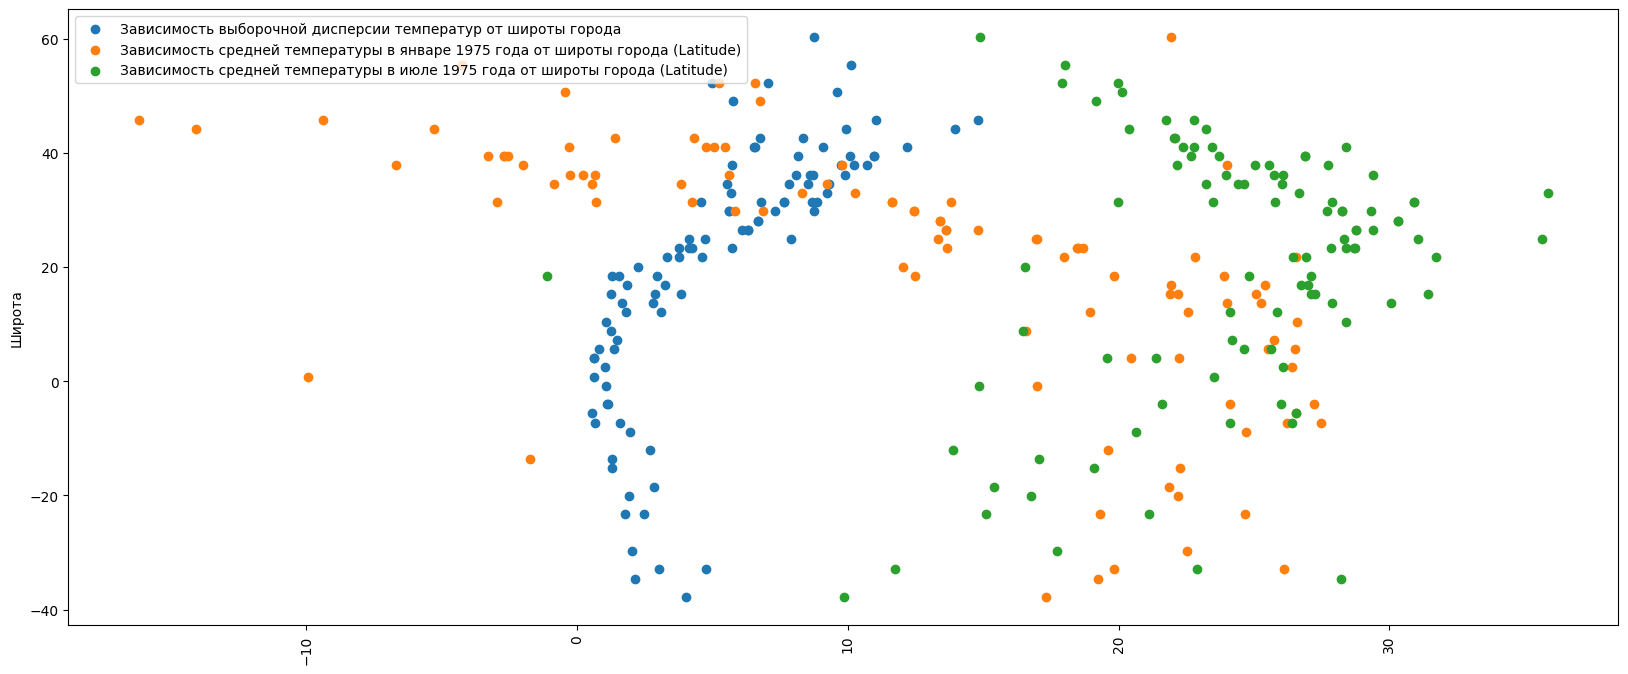

In [224]:
f = plt.figure()
f.set_size_inches(20,8)
plt.scatter(data_std.values, data_grouped.Latitude.values, label='Зависимость выборочной дисперсии температур от широты города')
plt.scatter(data_jan.AverageTemperature, data_grouped.Latitude.values, label='Зависимость средней температуры в январе 1975 года от широты города (Latitude)')
plt.scatter(data_july.AverageTemperature, data_grouped.Latitude.values, label='Зависимость средней температуры в июле 1975 года от широты города (Latitude)')
plt.xticks(rotation = 90)
plt.ylabel('Широта')
plt.legend()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [225]:
data_petersburg = data[data['City'] == 'Saint Petersburg']['AverageTemperature']
data_petersburg = data_petersburg.resample('Y').mean()
data_petersburg.index = data_petersburg.index.year
feature = (data_petersburg > data_petersburg.shift(1)) & (data_petersburg > data_petersburg.shift(-1))

In [226]:
feature = feature[feature == True]
feature

1953    True
1957    True
1959    True
1961    True
1964    True
1967    True
1972    True
1975    True
1977    True
1979    True
1983    True
1986    True
1989    True
1992    True
1995    True
1997    True
2000    True
2002    True
2005    True
2008    True
2011    True
Name: AverageTemperature, dtype: bool

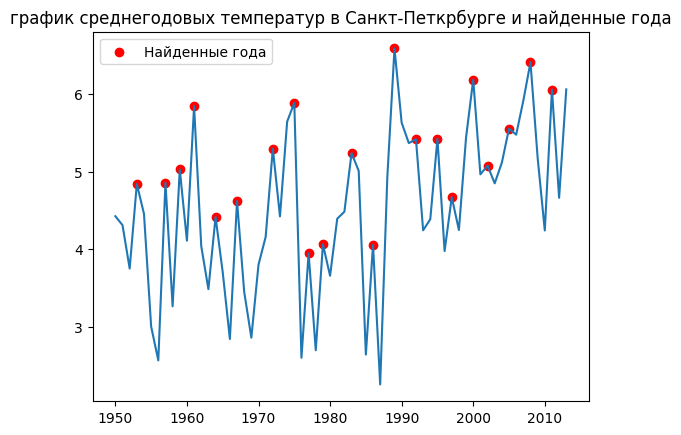

In [227]:
plt.title('график среднегодовых температур в Санкт-Петкрбурге и найденные года')
plt.scatter(feature.index,  data_petersburg[feature.index].values, color='red', label = 'Найденные года')
plt.plot(data_petersburg.index, data_petersburg.values)
plt.legend()
plt.show()

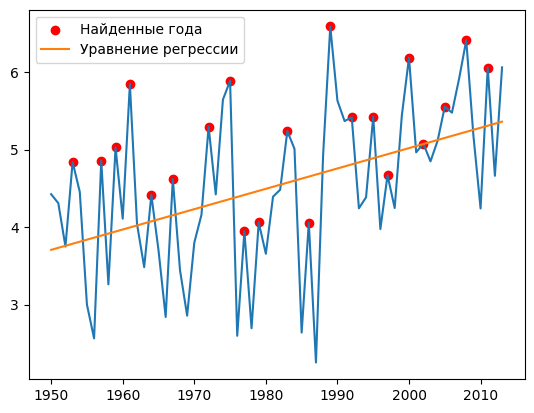

In [228]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
reg.fit(np.array(data_petersburg.index).reshape(-1, 1), data_petersburg.values)

plt.scatter(feature.index,  data_petersburg[feature.index].values, color='red', label = 'Найденные года')
plt.plot(data_petersburg.index, data_petersburg.values)
plt.plot(data_petersburg.index, reg.predict(np.array(data_petersburg.index).reshape(-1, 1)), label='Уравнение регрессии')
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

#### 1.

In [229]:
unique_cities = data.City.unique()

In [230]:
def get_minmax_diff_each_city(df):
    res = pd.DataFrame()
    res['City'] = unique_cities
    values = []
    
    for city in unique_cities:
        data_city = data[data['City'] == city]['AverageTemperature']
        data_city = data_city.resample('Y').mean()
        data_city.index = data_city.index.year
        values.append(data_city.values.max() - data_city.values.min())
    res['Metric'] = values
    return res

#### 1. Ответ:  

In [231]:
data_yearly_maxrange = get_minmax_diff_each_city(data[['City','AverageTemperature']])
data_yearly_maxrange[data_yearly_maxrange.Metric == data_yearly_maxrange.Metric.max()]

,City,Metric
60,Mashhad,5.25


#### 2.

In [232]:
data_jan = data[data.index.month == 1]
data_jan = data_jan[['AverageTemperature','City']]

In [233]:
data_jan = data_jan.rename(columns={'AverageTemperature': 'AverageTemperatureJan'})
data_jan

,AverageTemperatureJan,City
1950-01-01,26.773,Abidjan
1951-01-01,26.944,Abidjan
1952-01-01,27.009,Abidjan
1953-01-01,26.987,Abidjan
1954-01-01,26.616,Abidjan
...,...,...
2009-01-01,-1.516,Xian
2010-01-01,-0.237,Xian
2011-01-01,-4.811,Xian
2012-01-01,-2.416,Xian


In [234]:
data_july = data[data.index.month == 7]
data_july = data_july[['AverageTemperature','City']]

In [235]:
data_jan['AverageTemperatureJuly'] = data_july['AverageTemperature'].values

In [236]:
data_jan['diff'] = data_jan['AverageTemperatureJuly'] - data_jan['AverageTemperatureJan']

In [237]:
data_jan = data_jan[['City','diff']]
data_jan

,City,diff
1950-01-01,Abidjan,-1.895
1951-01-01,Abidjan,-2.161
1952-01-01,Abidjan,-2.225
1953-01-01,Abidjan,-2.426
1954-01-01,Abidjan,-2.808
...,...,...
2009-01-01,Xian,27.016
2010-01-01,Xian,25.959
2011-01-01,Xian,29.706
2012-01-01,Xian,27.062


#### 2. Ответ:  

In [238]:
#Самая большая средняя разница между средней температурой января и средней температурой июля.
data_jan.groupby('City')['diff'].mean().sort_values().tail(1)

City
Harbin    41.992719
Name: diff, dtype: float64

#### 3.  

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

2013 - last year -> from 2004 to 2013

In [269]:
res = pd.DataFrame()
res['City'] = unique_cities
values = []
lat = []
lon = []

for city in unique_cities:
    data_city = data[(data['City'] == city) & (data.index.month == 1) & (data.index.year > 2003)]
    lat.append(data_city['Latitude'].values.max())
    lon.append(data_city['Longitude'].values.max())
    data_city.index = data_city.index.year
    values.append(data_city['AverageTemperature'].values.mean())
res['jan_temp'] = values
res['lon'] = lon
res['lat'] = lat

In [270]:
res

,City,jan_temp,lon,lat
0,Abidjan,27.2830,-3.23,5.63
1,Addis Abeba,18.2239,38.11,8.84
2,Ahmadabad,19.9577,72.52,23.31
3,Aleppo,5.9257,37.79,36.17
4,Alexandria,14.8218,30.16,31.35
...,...,...,...,...
95,Tokyo,1.8162,139.23,36.17
96,Toronto,-6.7642,-80.50,44.20
97,Umm Durman,23.3256,32.50,15.27
98,Wuhan,3.7445,114.46,29.74


In [271]:
import folium
import branca.colormap as cm

### Красный цвет - максимальное значение, зеленый - минимальное

In [276]:
linear = cm.LinearColormap(["green", "yellow", "red"], vmin=res['jan_temp'].min(), vmax=res['jan_temp'].max())

m = folium.Map([res['lat'].mean(), res['lon'].mean()], tiles="cartodbpositron", zoom_start=2)

for _, row in res.iterrows():
    folium.CircleMarker([row.lat, row.lon],
                      popup=row.City,
                      radius=3,
                      color = linear(row.jan_temp),
                      ).add_to(m)

m

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*